# Analysis for Differential Jet Mass in Z+Jets events with NanoAODv9

In [1]:
import awkward as ak
import numpy as np
import time
import coffea
import uproot
import hist
import vector
print("awkward version ", ak.__version__)
print("coffea version ", coffea.__version__)
from coffea import util, processor
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema, BaseSchema
from collections import defaultdict
import pickle
from distributed.diagnostics.plugin import UploadDirectory
import os

awkward version  1.7.0
coffea version  0.7.11


### Automatically reload any modules used

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from smp_utils import *
from cms_utils import *
from response_maker_nanov9_lib_ak4 import *
from response_maker_nanov9_ak4 import *

In [88]:
f = uproot.open("/mnt/data/cms/store/mc/RunIISummer20UL16NanoAODv9/DYJetsToLL_M-50_HT-100to200_TuneCP5_PSweights_13TeV-madgraphMLM-pythia8/NANOAODSIM/106X_mcRun2_asymptotic_v17-v2/260000/18D0A087-30BD-FE4E-B447-5F493C2D2794.root")
f["Events"].keys()

['run',
 'luminosityBlock',
 'event',
 'HTXS_Higgs_pt',
 'HTXS_Higgs_y',
 'HTXS_stage1_1_cat_pTjet25GeV',
 'HTXS_stage1_1_cat_pTjet30GeV',
 'HTXS_stage1_1_fine_cat_pTjet25GeV',
 'HTXS_stage1_1_fine_cat_pTjet30GeV',
 'HTXS_stage1_2_cat_pTjet25GeV',
 'HTXS_stage1_2_cat_pTjet30GeV',
 'HTXS_stage1_2_fine_cat_pTjet25GeV',
 'HTXS_stage1_2_fine_cat_pTjet30GeV',
 'HTXS_stage_0',
 'HTXS_stage_1_pTjet25',
 'HTXS_stage_1_pTjet30',
 'HTXS_njets25',
 'HTXS_njets30',
 'nboostedTau',
 'boostedTau_chargedIso',
 'boostedTau_eta',
 'boostedTau_leadTkDeltaEta',
 'boostedTau_leadTkDeltaPhi',
 'boostedTau_leadTkPtOverTauPt',
 'boostedTau_mass',
 'boostedTau_neutralIso',
 'boostedTau_phi',
 'boostedTau_photonsOutsideSignalCone',
 'boostedTau_pt',
 'boostedTau_puCorr',
 'boostedTau_rawAntiEle2018',
 'boostedTau_rawIso',
 'boostedTau_rawIsodR03',
 'boostedTau_rawMVAnewDM2017v2',
 'boostedTau_rawMVAoldDM2017v2',
 'boostedTau_rawMVAoldDMdR032017v2',
 'boostedTau_charge',
 'boostedTau_decayMode',
 'boostedTau_je

# f["Events"].keys()

In [70]:
#from dask.distributed import Client

#client = Client("tls://rappoccio-40gmail-2ecom.dask.cmsaf-prod.flatiron.hollandhpc.org:8786")
#client

In [71]:
#client.register_worker_plugin(UploadDirectory("/home/cms-jovyan/QJetMassUproot", restart=True, update_path=True), nanny=True)
#print(client.run(os.listdir, "dask-worker-space") )

### If desired, uncomment these to move or remove old pkl files

In [86]:
 # ! mv qjetmass_zjets_gen.pkl qjetmass_zjets_gen_old_v4.pkl
# ! mv qjetmass_zjets_reco.pkl qjetmass_zjets_reco_old.pkl

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)


In [73]:
#client.scheduler_info()['workers']

### If you want to rerun, here is the line. Otherwise keep it commented to just read the pkl file. 

In [4]:
fout = uproot.recreate("skimmed_mc.root")

In [5]:
response_maker_nanov9(testing= False, do_gen=True, client=None, prependstr="/mnt/data/cms",skimfilename = "skimmed_mc")
#response_maker_nanov9(testing=True, do_gen=True, client=client)

Preprocessing:   0%|          | 0/529 [00:00<?, ?file/s]

Processing:   0%|          | 0/557 [00:00<?, ?chunk/s]

/opt/conda/lib/python3.8/site-packages/coffea/processor/executor.py:261: UserWarning: Cancelling 17 running jobs (likely due to an exception)
  warnings.warn(


UnboundLocalError: local variable 'reco_jet' referenced before assignment

Failed processing file: WorkItem(dataset='UL18NanoAODv9', filename='/mnt/data/cms/store/mc/RunIISummer20UL18NanoAODv9/DYJetsToLL_M-50_HT-800to1200_TuneCP5_PSweights_13TeV-madgraphMLM-pythia8/NANOAODSIM/106X_upgrade2018_realistic_v16_L1v1-v1/280000/0352722F-19DF-6D4D-8854-08F6E44F009D.root', treename='Events', entrystart=0, entrystop=51852, fileuuid=b'~\x1d\x80,\xf2\xeb\x11\xeb\x8a\x1bq\t\r\n\xbe\xef', usermeta={})

In [24]:
#response_maker_nanov9(testing=True, do_gen=True, client=client)
#response_maker_nanov9(testing=False, do_gen=True, client=None, prependstr="/mnt/data/cms")

In [ ]:
#response_maker_nanov9(testing=True, do_gen=False, client=None, prependstr="/mnt/data/cms")

### Open pkl file for the output histograms

In [75]:
with open("qjetmass_zjets_gen.pkl", "rb") as f:
    output = pickle.load( f )

In [76]:
output.keys()

dict_keys(['ptfrac_z_jet_reco', 'pt_jet_over_z_gen', 'ptjet_mjet_g_gen', 'ptasym_z_jet_reco', 'ptz_reco', 'response_matrix_u', 'mz_reco', 'ptfrac_z_jet_gen', 'ptjet_mjet_u_gen', 'dphi_z_jet_reco', 'm_g_jet_reco_over_gen', 'njet_gen', 'ptz_gen', 'ptjet_gen_pre', 'cutflow', 'pt_jet_reco_over_gen', 'drjet_reco_gen', 'response_matrix_g', 'ptasym_z_jet_gen', 'dr_reco_to_gen_subjet', 'mz_reco_over_gen', 'njet_reco', 'dphi_z_jet_gen', 'dr_gen_subjet', 'm_u_jet_reco_over_gen', 'mz_gen', 'pt_z_gen_over_reco', 'dr_z_jet_reco', 'ptjet_mjet_g_reco', 'ptjet_reco_over_gen', 'dr_z_jet_gen', 'ptjet_mjet_u_reco'])

In [42]:
output["cutflow"]

{'UL18NanoAODv9': defaultdict(int,
             {'z_jet_dphi_sel_gen': 18389493,
              'twoGen_mm': 12542671,
              'z_jet_dphi_sel_reco': 15765291,
              'z_mcut_gen': 18286566,
              'presel_reco': 2575145,
              'oneRecoJet': 88762173,
              'toposel_gen': 8831307,
              'twoReco_leptons': 10732923,
              'twoReco_ee': 3283483,
              'toposel_reco': 4612216,
              'kinsel_reco': 9201094,
              'z_ptcut_gen': 19135829,
              'z_ptcut_reco': 37615211,
              'z_mcut_reco': 17296460,
              'all events': 91880250,
              'allsel_gen': 4372424,
              'weights cut': 89407264,
              'twoGen_ee': 7554478,
              'kinsel_gen': 17379317,
              'allsel_reco': 2003519,
              'twoReco_mm': 7449458,
              'z_pt_asym_sel_gen': 33585685,
              'twoGen_leptons': 20096660,
              'oneGenJet': 89070229,
              'z_pt_a

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fdb64b20a00>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

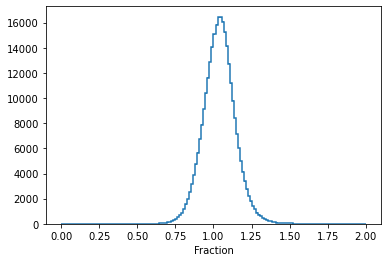

In [43]:
output['ptjet_reco_over_gen'].project('frac').plot()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fdb64a4b1c0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

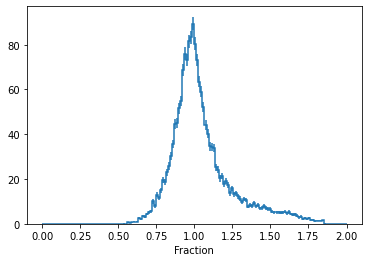

In [44]:
output['pt_jet_over_z_gen'].project('frac').plot()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fdb4da66e50>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

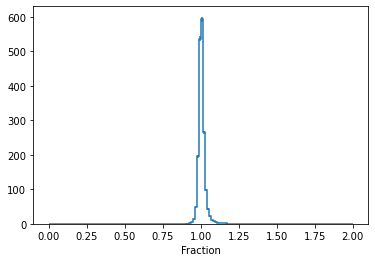

In [45]:
output['pt_z_gen_over_reco'].project('frac').plot()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fdb4d99f400>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

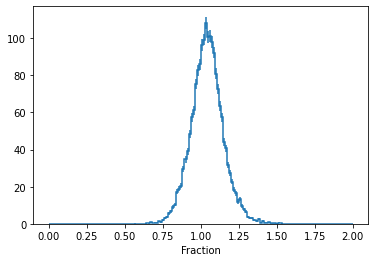

In [46]:
output['pt_jet_reco_over_gen'].project('frac').plot()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fdb2f58d8e0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

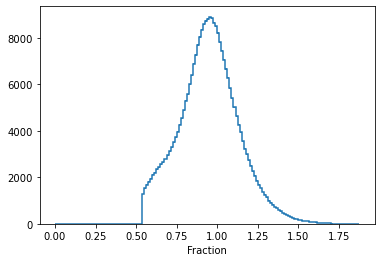

In [79]:
output['ptfrac_z_jet_reco'].project('frac').plot()

In [ ]:
h1020 = h[:,2:3,:].density()
h1020.project('frac').plot()

In [ ]:
#import matplotlib.pyplot as plt
#plt.rcParams["figure.figsize"] = (10,8)

In [ ]:

hlist = []
for i in range(h.axes[1].size-1):
    hlist.append(h[:,i:i+1,:])

for h in hlist:
    h.project('frac').plot(density = True)
plt.show()

In [ ]:
hlist[3].project('ptreco').plot()